# Assignment 8
## Due June 20th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

# Exercise 1 (Bootstrap, 2+1+1+2+3 points)

## a)
\begin{align}
    P(X_i \mid \theta) 
    &= \begin{cases} \frac{1}{\theta} & \text{if } X_i \geq \theta \\ 0 & \text{else} \end{cases} \\
    P(X \mid \theta) 
    &= \begin{cases} \frac{1}{\theta} & \text{if } X_i \geq \theta \quad \forall i = 1, \dots,n\\ 0 & \text{else} \end{cases} \\
    &= \begin{cases} \frac{1}{\theta} & \text{if } \max_i X_i \geq \theta \\ 0 & \text{else} \end{cases} \\
    \implies \hat\theta_n &= \arg\max_{\theta} P(X \mid \theta) = \max_i X_i \\\\
    F_{\hat\theta_n}(z) 
    &= P(\hat\theta_n\leq z) \\
    &= P(\max_i X_i \leq z)  \\
    &= \begin{cases}0 & \text{if } z<\max_i X_i \\ 1 &\text{else}\end{cases}
\end{align}


## b)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### b)

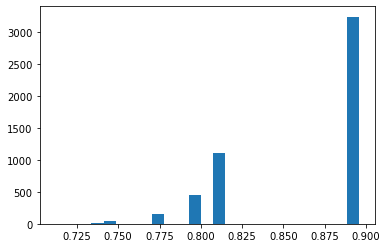

In [2]:
B=5000
n=25

# data points
X=np.random.rand(n)

# array holding the bootstrap estimates of theta
theta_nonparam_boot = np.zeros(B)

for i in range(B):
    # draw
    X_nb = np.random.choice(X, size=n)
    theta_nonparam_boot[i] = X_nb.max()


_ = plt.hist(theta_nonparam_boot, bins=n)

## c) 
\begin{align*}
    P(T^*_n \leq 0) 
    &=1-P(T^*_n \geq 0) \\
    &= 1-P(\hat\theta_n^* \leq \hat\theta_n)\\
    &= 1-P\left(\max_i X_i \not\in X^*\right) \\
    &= 1-\prod_j^n P(X^*_j \neq \max_i X_i) \\
    &= 1-\prod_j^n 1-\frac{1}{n} \\
    &= 1-\left( 1-\frac{1}{n}\right)^n \\
\end{align*}

## d)

\begin{align*}
    \limsup_{n\to\infty} \sup_{t\in\mathbb{R}} |P(T_n\leq t) - P(T_n^*\leq t)| &\geq 1-e^{-1}
    \\\iff 
    \sup_{t\in\mathbb{R}} |P(T_n\leq t) - P(T_n^*\leq t)| &\geq \left(1-\frac{1}{n}\right)^n
    \\\iff 
    \sup_{t\in\mathbb{R}} |P(T_n\leq t) - P(T_n^*\leq t)| &\geq P(T^*_n \geq 0)
\end{align*}

## e)

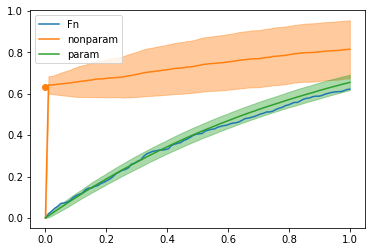

In [3]:
n_realizations = 500
B=200
n=25

Tn = np.zeros(n_realizations)
Tn_nb, Tn_pb = [np.zeros((n_realizations,B)) for _ in range(2)]

# compute T_n, T_n^* and T_n^~ for param. as well as nonparam. bootstrap
for i in range(n_realizations):
    X = np.random.rand(n)
    theta_hat = X.max()
    Tn[i] = n * (1-theta_hat)
    
    for j in range(B):
        X_nb = np.random.choice(X, size=n)
        X_pb = np.random.rand(n) * theta_hat
        Tn_nb[i,j] = n * (theta_hat - X_nb.max())
        Tn_pb[i,j] = n * (theta_hat - X_pb.max())
    

# for each realization compute the empirical cumulative distribution function (ecdf) of T_n across realizations and, for each realization, the ecdf of T_n^* and T_n^~ across bootstrap samples
zs = np.linspace(0,1,100)
Fn = np.zeros_like(zs)
Fn_nb, Fn_pb = [np.zeros((zs.shape[0],n_realizations)) for _ in range(2)]

for i, z in enumerate(zs):
    Fn[i] = 1/n_realizations * np.sum(Tn < z)
    for j in range(n_realizations):
        Fn_nb[i,j] = 1/B * np.sum(Tn_nb[j] < z)
        Fn_pb[i,j] = 1/B * np.sum(Tn_pb[j] < z)
        

# plot the empirical distribution functions with uncertainty bands across realizations
plt.plot(zs, Fn, label = 'Fn')
plt.plot(zs, [Fn_nb[iz,:].mean() for iz in range(zs.shape[0])], label = 'nonparam')
plt.fill_between(zs, [Fn_nb[iz,:].mean()-Fn_nb[iz,:].std() for iz in range(zs.shape[0])],[Fn_nb[iz,:].mean()+Fn_nb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:orange')
plt.plot(zs, [Fn_pb[iz,:].mean() for iz in range(zs.shape[0])], label = 'param')
plt.fill_between(zs, [Fn_pb[iz,:].mean()-Fn_pb[iz,:].std() for iz in range(zs.shape[0])],[Fn_pb[iz,:].mean()+Fn_pb[iz,:].std() for iz in range(zs.shape[0])], alpha = 0.4, color = 'tab:green')
plt.scatter(0,1-np.exp(-1),color='tab:orange')
plt.legend()

## Exercise 2

## a)


\begin{align*}
Z_t &= \sum_i D_t(i) \exp(- y_i \alpha_t h_t(x_i))\\
&= \sum_i D_t(i) \exp(- \alpha_t y_i h_t(x_i))\\
&= \sum_{i; y_i h_t(x_i) = 1} D_t(i) \exp(-\alpha) + \sum_{i; y_i h_t(x_i) = -1} D_t(i) \exp(\alpha) \\
&= \sum_{i; y_i h_t(x_i) = 1} D_t(i) \exp(-\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t})) + \sum_{i; y_i h_t(x_i) = -1} D_t(i) \exp(\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t}))\\
&=  P_{i \sim D_t} (y_i = h_t(x_i)) \exp(-\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t})) +  P_{i \sim D_t} (y_i \neq h_t(x_i)) \exp(\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t}))\\
&=  (1- \epsilon_t))  \exp(-\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t})) +  \epsilon_t  \exp(\frac{1}{2} \ln(\frac{1-\epsilon_t}{\epsilon_t}))\\
&=  (1- \epsilon_t))  \sqrt{\frac{\epsilon_t}{1-\epsilon_t}} +  \epsilon_t  \sqrt{\frac{1-\epsilon_t}{\epsilon_t}}\\
&= 2 \sqrt{\epsilon_t(1-\epsilon_t)}


\end{align*}

## Exercise 3


In [36]:
with open('rfdata_train.npy', 'rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)

with open('rfdata_test.npy', 'rb') as f:
    X_test = np.load(f)
    y_test = np.load(f)
    
X_train.shape, y_train.shape, X_test.shape

((750, 50), (750,), (250, 50))

### a)

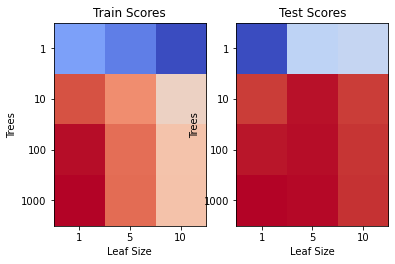

In [51]:
from sklearn.ensemble import RandomForestRegressor

n_trees = [1,10,100,1000]
n_inleaf = [1,5,10]

train_scores, test_scores = [np.zeros((len(n_trees),len(n_inleaf))) for _ in range(2)]

# save scores to index [i_tree, i_inleaf] and make a heatmap
for i_tree, n_tree in enumerate(n_trees):
    for i_inleaf, n_leaf in enumerate(n_inleaf):
        rfr = RandomForestRegressor(n_estimators=n_tree, min_samples_leaf=n_leaf)
        rfr.fit(X_train, y_train)
        train_scores[i_tree, i_inleaf] = rfr.score(X_train, y_train)
        test_scores[i_tree, i_inleaf] = rfr.score(X_test, y_test)
        
        
fig, axs = plt.subplots(1,2)
axs[0].imshow(train_scores, cmap=plt.cm.coolwarm)
axs[0].set_title("Train Scores")
axs[1].imshow(test_scores, cmap=plt.cm.coolwarm)
axs[1].set_title("Test Scores")
for ax in axs:
    ax.set_yticks([0,1,2,3])
    ax.set_yticklabels(n_trees)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(n_inleaf)
    ax.set_xlabel("Leaf Size")
    
ax[0].set_ylabel("Trees")

plt.show()

### Conclusions:

1. In the train set, the algorithm does better with smaller nodes and with more trees
2. In the test set, less trees seem to do better with bigger nodes, while more trees can achieve better results with smaller nodes
3. Overall more trees seem to strictly inrease the score, while more (smaller) nodes are somewhat bad for generalization while delivering high accuracy (the 'being bad for generalization' can be mitigated by using many trees)

### b)

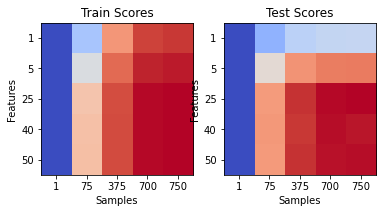

In [52]:
n_train, n_feat = X_train.shape

# make heatmaps of train and test score for various choices of number of features per split and number of samples per bootstrap sample

features = [1, 5, 25, 40, n_feat]
samples = [1, 75, 375, 700, n_train]

train_scores, test_scores = [np.zeros((len(features),len(samples))) for _ in range(2)]

# save scores to index [i_tree, i_inleaf] and make a heatmap
for i_feat, n_feat in enumerate(features):
    for i_sample, n_sample in enumerate(samples):
        rfr = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, max_samples=n_sample, max_features=n_feat)
        rfr.fit(X_train, y_train)
        train_scores[i_feat, i_sample] = rfr.score(X_train, y_train)
        test_scores[i_feat, i_sample] = rfr.score(X_test, y_test)
        
        
fig, axs = plt.subplots(1,2)
axs[0].imshow(train_scores, cmap=plt.cm.coolwarm)
axs[0].set_title("Train Scores")
axs[1].imshow(test_scores, cmap=plt.cm.coolwarm)
axs[1].set_title("Test Scores")
for ax in axs:
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(features)
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(samples)

    ax.set_xlabel("Samples")
ax[0].set_ylabel("Features")
    
plt.show()

### Conclusions:

YOUR ANSWER HERE

In [57]:
inform_features = np.array([ 2,  9, 14, 19, 20, 25, 27, 29, 42, 45, 46, 47])

rfr = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1)
rfr.fit(X_train, y_train)
indices = np.argsort(rfr.feature_importances_)
rf_features = np.arange(50)[indices][-12:]

print(len(rf_features) == 12)
len(np.intersect1d(inform_features, rf_features)) == 12 

True


True

### What did you do?
We extracted the feature importances from the Random Forest Regressor. This is calculated from "total reduction of the criterion brought by that feature". (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) 

### What could you do instead?

You could run the random forest algorithm with some features cut out of the training set. When having tried all permutations, the regressior with the best ratio of score to features_used, contains the most informative features. Although this would be incredibly inefficient.